In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

## Obtain Data
The stock price data will be obtained through Yahoo Finance throughout the course.

In [2]:
import yfinance as yf

# Get the data for the stock AAPL
ford = yf.download('F','2018-01-01', datetime.today(), progress=False)['Adj Close']
ge = yf.download('GE','2016-01-01', datetime.today(), progress=False)['Adj Close']

Quick visualizations

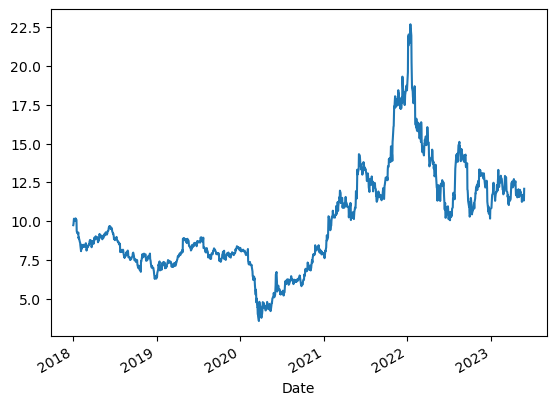

In [3]:
ford.plot();

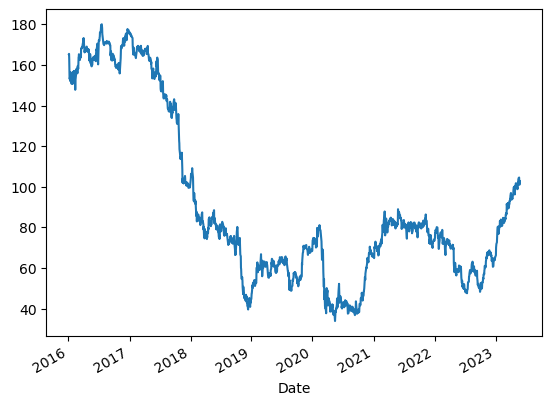

In [4]:
ge.plot();

## Merging series
**Exercise 1**: Consolidate the Data of Ford and GE into one single DataFrame based on the date index.

In [5]:
df = pd.concat([ford.rename('Ford'),ge.rename('GE')], axis=1)
df

,Ford,GE
Date,,
2016-01-04,NaN,165.310425
2016-01-05,NaN,165.471924
2016-01-06,NaN,162.834290
2016-01-07,NaN,155.944061
2016-01-08,NaN,153.144974
...,...,...
2023-05-22,11.63,104.550003
2023-05-23,11.73,101.699997
2023-05-24,11.33,100.980003


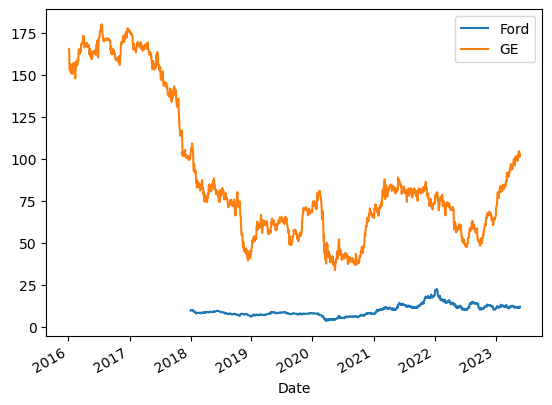

In [6]:
df.plot();

**Exercise 2**: Remove all the entries where there are missing values

In [7]:
df.dropna(how='any',inplace=True)

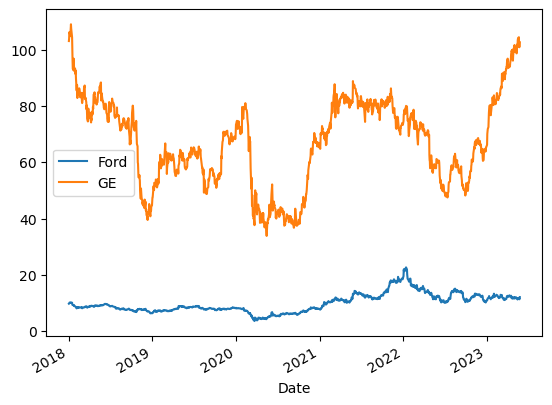

In [8]:
df.plot();

**Exercise**: What values do you have for Jan 8th, 2021 ?

In [9]:
df.loc['2021-01-08']

Ford     8.057257
GE      70.229103
Name: 2021-01-08 00:00:00, dtype: float64

## Financial Analysis
**Exercise**: calculate the difference between the return of GE and Ford

In [10]:
df_returns = df.pct_change(periods=1)
df_returns.loc[:, 'Diff'] = df_returns.GE - df_returns.Ford
df_returns

,Ford,GE,Diff
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.007899,0.009455,0.001556
2018-01-04,0.017241,0.020936,0.003695
2018-01-05,0.016949,0.000540,-0.016409
2018-01-08,-0.003788,-0.014024,-0.010236
...,...,...,...
2023-05-22,-0.001717,0.002782,0.004498
2023-05-23,0.008598,-0.027260,-0.035858
2023-05-24,-0.034101,-0.007080,0.027021


**Exercise**: obtain the log returns for both assets

In [11]:
df_returns['Ford_logret'] = df_returns['Ford'].apply(lambda x : np.log(1+x))
df_returns['GE_logret'] = df_returns['GE'].apply(lambda x : np.log(1+x))
df_returns.head()

,Ford,GE,Diff,Ford_logret,GE_logret
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.007899,0.009455,0.001556,0.007868,0.009411
2018-01-04,0.017241,0.020936,0.003695,0.017094,0.020720
2018-01-05,0.016949,0.000540,-0.016409,0.016807,0.000540
2018-01-08,-0.003788,-0.014024,-0.010236,-0.003795,-0.014123


**Exercise**: compute the rolling window volatility (annualized) using a window size of 20

In [12]:
df_returns['Ford_volatility'] = df_returns['Ford_logret'].rolling(window=20).apply(lambda x : np.std(x)*np.sqrt(250))
df_returns['GE_volatility'] = df_returns['GE_logret'].rolling(window=20).apply(lambda x : np.std(x)*np.sqrt(250))
df_returns.tail()

,Ford,GE,Diff,Ford_logret,GE_logret,Ford_volatility,GE_volatility
Date,,,,,,,
2023-05-22,-0.001717,0.002782,0.004498,-0.001718,0.002778,0.274298,0.232485
2023-05-23,0.008598,-0.027260,-0.035858,0.008562,-0.027638,0.267771,0.245728
2023-05-24,-0.034101,-0.007080,0.027021,-0.034696,-0.007105,0.285792,0.231625
2023-05-25,0.004413,0.005348,0.000934,0.004403,0.005333,0.285347,0.224016
2023-05-26,0.062390,0.012017,-0.050373,0.060521,0.011946,0.347361,0.225341


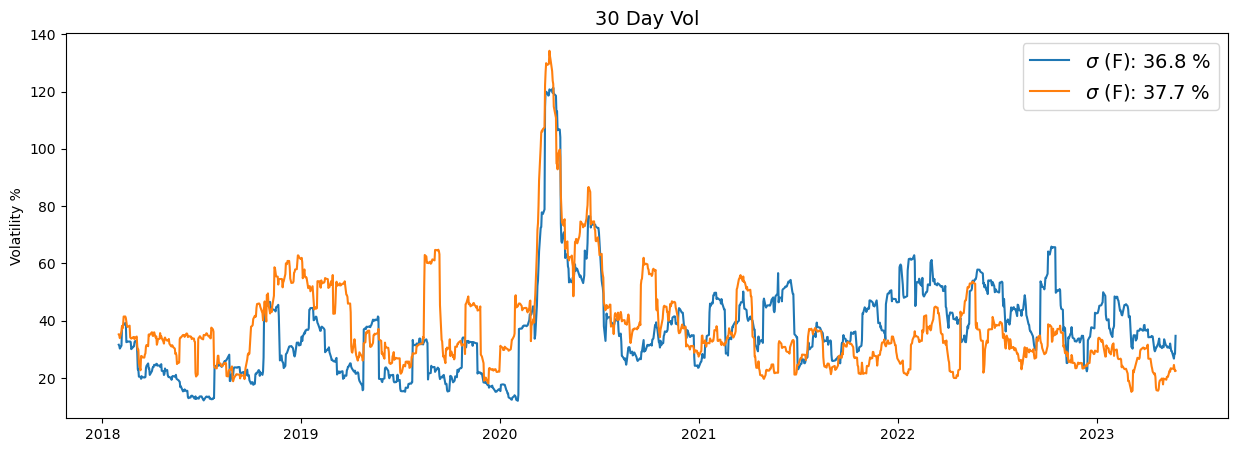

In [13]:
fig , ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(df_returns.index, df_returns['Ford_volatility']*100,
        label='$\sigma$ (F): '+ str(100*np.round(df_returns['Ford_volatility'].mean(),3))+ ' %')
ax.plot(df_returns.index, df_returns['GE_volatility']*100,
        label='$\sigma$ (F): '+ str(100*np.round(df_returns['GE_volatility'].mean(),3))+ ' %')

ax.set_title('30 Day Vol',fontsize=14)
ax.legend(fontsize=14)
ax.set_ylabel('Volatility %');

**Exercise**: compute the rolling correlation (window size=100)

In [14]:
df_returns.dropna(how='any',inplace=True)

In [15]:
df_returns['corr'] = df_returns['Ford'].rolling(100).corr(df_returns['GE'])

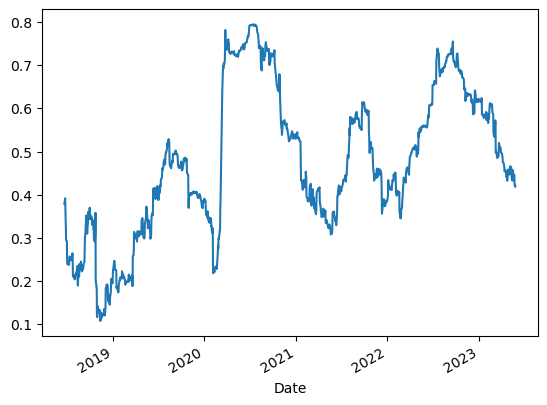

In [16]:
df_returns['corr'].plot();